let's continue our exploration of Support Vector Machines by looking at their application to regression problems: **Support Vector Regression (SVR)**.


---

**5. Support Vector Regression (SVR)**

While SVC aims to find a hyperplane that best separates classes, SVR works on a different principle: it tries to find a function that best fits the data, allowing for a certain tolerance for errors.

  * **Goal:** The goal of SVR is to fit a function $f(x)$ to the data such that as many training data points as possible lie *within* a specified margin (or "tube") around this function. The model also tries to keep the function itself as "flat" as possible to control complexity and prevent overfitting.

  * **The $\\epsilon$-Insensitive Tube (Epsilon-Insensitive Margin):**

      * SVR introduces a hyperparameter called **`epsilon` ($\\epsilon \\ge 0$)**. This defines the width of an "$\\epsilon$-insensitive tube" around the regression function.
      * Data points whose predicted values $f(x\_i)$ are within $\\pm\\epsilon$ of their actual target values $y\_i$ (i.e., $|y\_i - f(x\_i)| \\le \\epsilon$) do **not** contribute to the loss function. The model is "insensitive" to errors within this range.
      * Only the points that fall *outside* this tube are penalized.
      * This $\\epsilon$-insensitivity makes SVR robust to small amounts of noise and potentially some outliers.

    *(Conceptual image: Data points scattered around a regression line/curve. An epsilon-insensitive tube of width 2*epsilon is drawn around the line. Points inside the tube have zero error contribution.)\*

  * **Support Vectors in SVR:**

      * These are the training data points that lie exactly on the boundary of the $\\epsilon$-insensitive tube or outside of it.
      * These points are critical because they "support" or define the regression function and the tube. Points inside the tube (with errors less than $\\epsilon$) have no influence on the final function once the tube is defined.

  * **Mathematical Intuition (Briefly for SVR):**

      * The objective is typically to minimize the model's complexity (often represented by $\\frac{1}{2}||w||^2$ for a linear SVR, where $w$ is the weight vector) while ensuring that most errors $|y\_i - (w \\cdot x\_i + b)|$ are less than or equal to $\\epsilon$.
      * **Soft Margin SVR:** Similar to SVC, slack variables are introduced to allow some points to have errors larger than $\\epsilon$ (i.e., fall outside the tube).
      * **Hyperparameter `C` (Regularization Parameter):** Controls the trade-off between:
        1.  Minimizing the model's complexity (achieving a "flatter" function by minimizing $||w||^2$).
        2.  Minimizing the sum of errors for points outside the $\\epsilon$-tube (allowing fewer points outside the tube).
        <!-- end list -->
          * **Large `C`:** Less regularization. The model tries harder to fit more training points within or very close to the $\\epsilon$-tube, potentially leading to a more complex (less flat) function that might overfit.
          * **Small `C`:** More regularization. The model prioritizes a flatter (simpler) function, even if it means more points fall outside the $\\epsilon$-tube or have larger errors.
      * **Hyperparameter `epsilon` ($\\epsilon$):**
          * Directly controls the width of the $\\epsilon$-insensitive tube.
          * If $\\epsilon$ is very small, more points will be considered support vectors, and the model will try to fit the data more precisely.
          * If $\\epsilon$ is large, the tube is wider, fewer points will be support vectors, and the model will tolerate larger errors, potentially leading to a "rougher" fit if too large.

  * **Kernels in SVR:**

      * Just like SVC, SVR can employ the **kernel trick** to model non-linear relationships effectively. The same kernel functions (`linear`, `poly`, `rbf`, `sigmoid`) and their respective hyperparameters (`gamma`, `degree`, `coef0`) are applicable.
      * The RBF kernel is very popular for SVR due to its flexibility.

  * **Feature Scaling:** **Crucial** for SVR, especially when using kernels, as distance calculations are involved (implicitly with RBF, explicitly with how coefficients are determined relative to feature scales).

**Scikit-learn Implementation: `sklearn.svm.SVR`**

Key Parameters of `sklearn.svm.SVR`:

  * **`kernel` (str, default='rbf')**: 'linear', 'poly', 'rbf', 'sigmoid'.
  * **`C` (float, default=1.0)**: Regularization parameter.
  * **`epsilon` (float, default=0.1)**: Defines the $\\epsilon$-insensitive tube.
  * **`gamma` (float or {'scale', 'auto'}, default='scale')**: Kernel coefficient for 'rbf', 'poly', 'sigmoid'.
  * **`degree` (int, default=3)**: Degree for 'poly' kernel.
  * **`coef0` (float, default=0.0)**: Independent term for 'poly' and 'sigmoid' kernels.

---



**Example 1: SVR with Linear and RBF Kernels on Synthetic 1D Non-Linear Data**

This example will clearly visualize the $\\epsilon$-tube and the effect of SVR parameters.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler # Good practice, though impact is less on 1 feature if unscaled
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# --- 1. Generate Synthetic Non-Linear Data for Regression ---
np.random.seed(42)
n_samples_svr = 100
X_svr = np.sort(10 * np.random.rand(n_samples_svr, 1), axis=0) # Feature values between 0 and 10
y_svr = np.sin(X_svr).ravel() + np.random.randn(n_samples_svr) * 0.3 # y = sin(x) + noise

print("Synthetic SVR Dataset Created.")

Synthetic SVR Dataset Created.


In [4]:
# --- 2. Split Data (Optional for this small synthetic set, but good practice) ---
# For simplicity of visualization, we might fit on all data, but splitting is standard.
X_train_svr_raw, X_test_svr_raw, y_train_svr, y_test_svr = train_test_split(
    X_svr, y_svr, test_size=0.3, random_state=42
)

In [5]:
# --- 3. Feature Scaling ---
# Even for a single feature, if we want to test different gammas, scaling can make gamma values more interpretable
scaler_X_svr = StandardScaler()
X_train_svr = scaler_X_svr.fit_transform(X_train_svr_raw)
X_test_svr = scaler_X_svr.transform(X_test_svr_raw)

# Note: If y were also scaled, predictions would need to be inverse_transformed.
# Generally, y is not scaled for SVR in scikit-learn unless you handle it manually.

print("\nSVR Data Scaled.")


SVR Data Scaled.


In [7]:
# Corrected plot_svr function
def plot_svr(svr_model, X_raw, y_actual, X_scaled, title): # Assuming scaler_X_svr is globally available or passed
    plt.figure(figsize=(10, 6))
    plt.scatter(X_raw, y_actual, color='darkorange', label='Data', s=30, edgecolor='k', alpha=0.7)

    X_plot_raw = np.linspace(X_raw.min(), X_raw.max(), 200).reshape(-1, 1)
    X_plot_scaled = scaler_X_svr.transform(X_plot_raw) # Use the scaler defined in your main script
    
    y_pred_plot = svr_model.predict(X_plot_scaled)

    plt.plot(X_plot_raw, y_pred_plot, color='navy', lw=2, label=f'{svr_model.kernel} model')
    
    # Use raw strings (r"...") for labels with LaTeX
    if hasattr(svr_model, 'epsilon') and svr_model.epsilon > 0:
      plt.plot(X_plot_raw, y_pred_plot + svr_model.epsilon, 'k--', lw=1, alpha=0.7, 
               label=rf'$\epsilon$-tube (+{svr_model.epsilon:.2f})') # Raw string
      plt.plot(X_plot_raw, y_pred_plot - svr_model.epsilon, 'k--', lw=1, alpha=0.7, 
               label=rf'$\epsilon$-tube (-{svr_model.epsilon:.2f})') # Raw string

    plt.xlabel("Feature")
    plt.ylabel("Target")
    # Use raw strings for title parts with LaTeX
    title_string = title + rf" (C={svr_model.C}, $\epsilon$={svr_model.epsilon if hasattr(svr_model, 'epsilon') else 'N/A'}"
    if svr_model.kernel == 'rbf':
        title_string += rf", $\gamma$={svr_model.gamma})"
    else:
        title_string += ")"
    plt.title(title_string)
    plt.legend()
    plt.grid(True)
    plt.show()


--- SVR with Linear Kernel ---
Linear SVR - MSE: 0.5356, R2: -0.2337


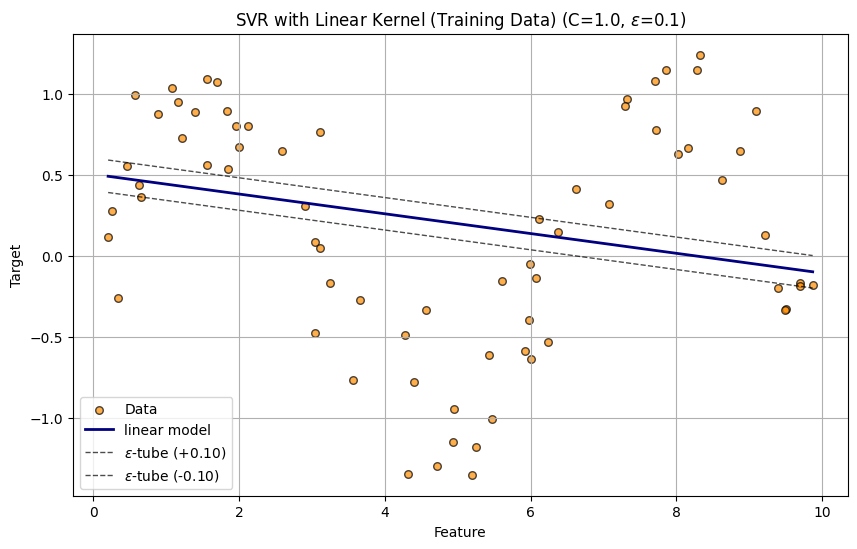

In [8]:
# --- 4. SVR with Linear Kernel ---
print("\n--- SVR with Linear Kernel ---")
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_linear.fit(X_train_svr, y_train_svr)
y_pred_linear_svr = svr_linear.predict(X_test_svr)
mse_linear_svr = mean_squared_error(y_test_svr, y_pred_linear_svr)
r2_linear_svr = r2_score(y_test_svr, y_pred_linear_svr)
print(f"Linear SVR - MSE: {mse_linear_svr:.4f}, R2: {r2_linear_svr:.4f}")
plot_svr(svr_linear, X_train_svr_raw, y_train_svr, X_train_svr, "SVR with Linear Kernel (Training Data)")


--- SVR with RBF Kernel ---
RBF SVR (C=1, eps=0.1, gamma='scale') - MSE: 0.0778, R2: 0.8208


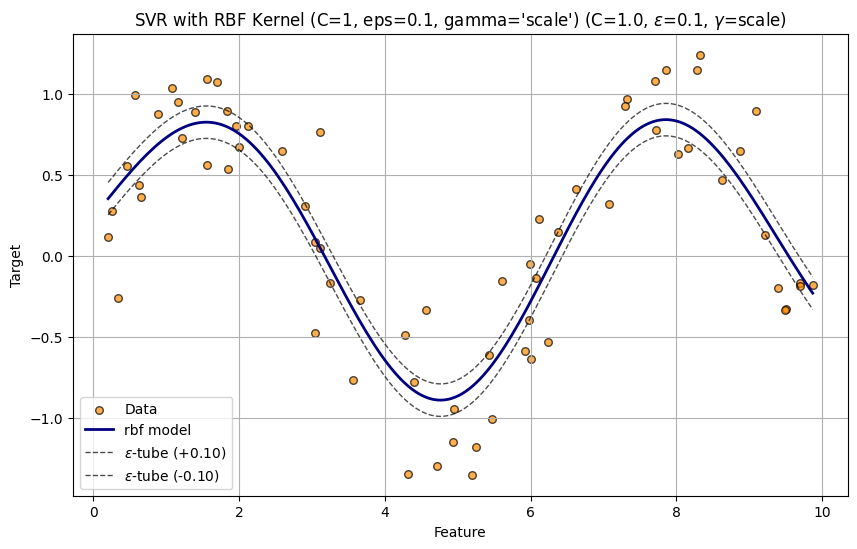

In [9]:
# --- 5. SVR with RBF Kernel - Varying C, epsilon, gamma ---
print("\n--- SVR with RBF Kernel ---")
# Example 1: Default RBF SVR
svr_rbf_1 = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale') # gamma='scale' is often a good default
svr_rbf_1.fit(X_train_svr, y_train_svr)
y_pred_rbf_1 = svr_rbf_1.predict(X_test_svr)
mse_rbf_1 = mean_squared_error(y_test_svr, y_pred_rbf_1)
r2_rbf_1 = r2_score(y_test_svr, y_pred_rbf_1)
print(f"RBF SVR (C=1, eps=0.1, gamma='scale') - MSE: {mse_rbf_1:.4f}, R2: {r2_rbf_1:.4f}")
plot_svr(svr_rbf_1, X_train_svr_raw, y_train_svr, X_train_svr, "SVR with RBF Kernel (C=1, eps=0.1, gamma='scale')")


---

** Example 2: Higher C (less regularization, tries to fit better)**

RBF SVR (C=100, eps=0.1, gamma='scale') - MSE: 0.0650, R2: 0.8502


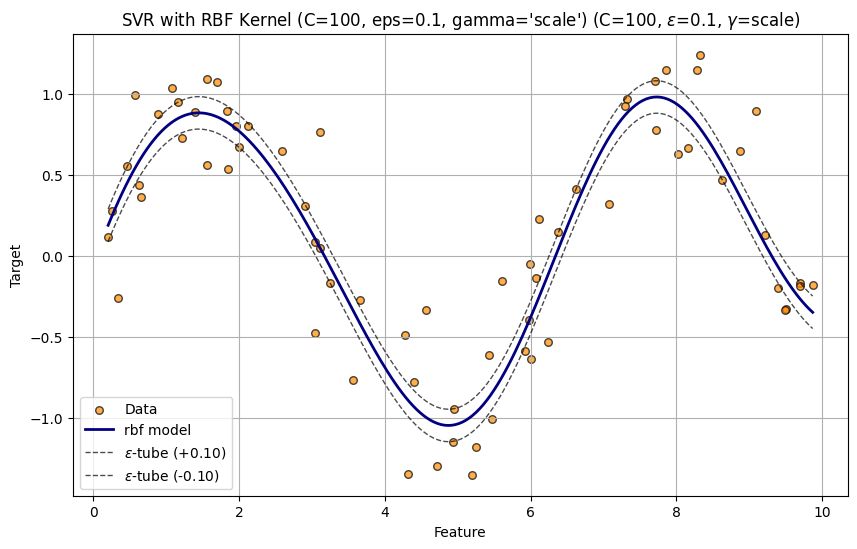

In [10]:
svr_rbf_2 = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
svr_rbf_2.fit(X_train_svr, y_train_svr)
y_pred_rbf_2 = svr_rbf_2.predict(X_test_svr)
mse_rbf_2 = mean_squared_error(y_test_svr, y_pred_rbf_2)
r2_rbf_2 = r2_score(y_test_svr, y_pred_rbf_2)
print(f"RBF SVR (C=100, eps=0.1, gamma='scale') - MSE: {mse_rbf_2:.4f}, R2: {r2_rbf_2:.4f}")
plot_svr(svr_rbf_2, X_train_svr_raw, y_train_svr, X_train_svr, "SVR with RBF Kernel (C=100, eps=0.1, gamma='scale')")

RBF SVR (C=100, eps=0.5, gamma='scale') - MSE: 0.0855, R2: 0.8030


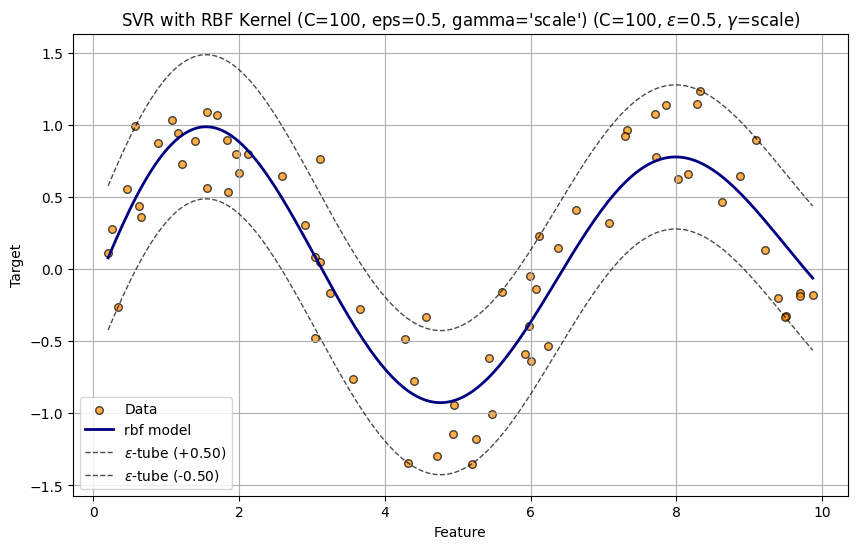

In [11]:
# Example 3: Larger epsilon (wider tube, more tolerance)
svr_rbf_3 = SVR(kernel='rbf', C=100, epsilon=0.5, gamma='scale')
svr_rbf_3.fit(X_train_svr, y_train_svr)
y_pred_rbf_3 = svr_rbf_3.predict(X_test_svr)
mse_rbf_3 = mean_squared_error(y_test_svr, y_pred_rbf_3)
r2_rbf_3 = r2_score(y_test_svr, y_pred_rbf_3)
print(f"RBF SVR (C=100, eps=0.5, gamma='scale') - MSE: {mse_rbf_3:.4f}, R2: {r2_rbf_3:.4f}")
plot_svr(svr_rbf_3, X_train_svr_raw, y_train_svr, X_train_svr, "SVR with RBF Kernel (C=100, eps=0.5, gamma='scale')")

RBF SVR (C=100, eps=0.1, gamma=1.0) - MSE: 0.0650, R2: 0.8502


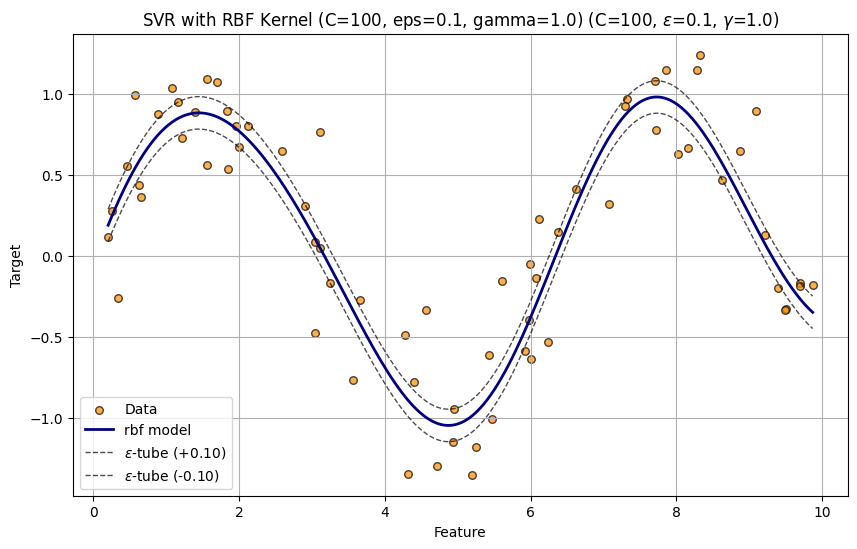

In [12]:
# Example 4: Different gamma (controls influence of single training example)
svr_rbf_4 = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=1.0) # Potentially more wiggly
svr_rbf_4.fit(X_train_svr, y_train_svr)
y_pred_rbf_4 = svr_rbf_4.predict(X_test_svr)
mse_rbf_4 = mean_squared_error(y_test_svr, y_pred_rbf_4)
r2_rbf_4 = r2_score(y_test_svr, y_pred_rbf_4)
print(f"RBF SVR (C=100, eps=0.1, gamma=1.0) - MSE: {mse_rbf_4:.4f}, R2: {r2_rbf_4:.4f}")
plot_svr(svr_rbf_4, X_train_svr_raw, y_train_svr, X_train_svr, "SVR with RBF Kernel (C=100, eps=0.1, gamma=1.0)")

**Discussion for SVR Example 1:**

  * The plots will visually demonstrate the linear SVR fit and the RBF SVR fit.
  * For RBF SVR, you'll see how the $\\epsilon$-insensitive tube is formed around the non-linear function.
  * Varying `C` will show how the model tries to accommodate more points within the tube (higher `C`) versus preferring a flatter function (lower `C`).
  * Varying `epsilon` will change the width of the tube: a larger `epsilon` means more data points are ignored in the loss calculation, potentially leading to a simpler but less precise fit.
  * Varying `gamma` will affect the smoothness/flexibility of the RBF kernel's fit.


-----

**Example 2: SVR on California Housing Dataset (Brief Demonstration)**

This will show SVR on a more complex, multi-dimensional dataset. Visualization of the $\\epsilon$-tube is not feasible here, but we can observe the performance.


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# --- 1. Load California Housing Dataset ---
housing = fetch_california_housing()
X_h, y_h = housing.data, housing.target
feature_names_h = housing.feature_names

X_h_df = pd.DataFrame(X_h, columns=feature_names_h)
print("\nCalifornia Housing Dataset Loaded for SVR.")

# --- 2. Split Data ---
X_train_h_raw, X_test_h_raw, y_train_h, y_test_h = train_test_split(
    X_h_df, y_h, test_size=0.3, random_state=42
)

# --- 3. Feature Scaling (Crucial for SVR) ---
scaler_h = StandardScaler()
X_train_h = scaler_h.fit_transform(X_train_h_raw)
X_test_h = scaler_h.transform(X_test_h_raw)
print("Housing Data Scaled for SVR.")

# --- 4. SVR with RBF Kernel and GridSearchCV for Hyperparameter Tuning ---
print("\n--- SVR with RBF Kernel on California Housing (GridSearchCV) ---")
# Define a smaller parameter grid for faster execution in this example
# In practice, you'd explore a wider range.
param_grid_svr = {
    'C': [1, 10, 50], # Might need larger C for complex data
    'gamma': ['scale', 0.1, 1], # 'scale' is often a good starting point
    'epsilon': [0.1, 0.2]
}

# n_jobs=-1 uses all available cores
# cv=3 for faster cross-validation in this example; 5 or 10 is more common.
svr_gscv_housing = GridSearchCV(SVR(kernel='rbf'), param_grid_svr, cv=3,
                                scoring='r2', n_jobs=-1, verbose=1)
svr_gscv_housing.fit(X_train_h, y_train_h)

print(f"\nBest parameters found by GridSearchCV: {svr_gscv_housing.best_params_}")
print(f"Best cross-validated R2 score: {svr_gscv_housing.best_score_:.4f}")


California Housing Dataset Loaded for SVR.
Housing Data Scaled for SVR.

--- SVR with RBF Kernel on California Housing (GridSearchCV) ---
Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [ ]:

# --- 5. Evaluate the Best SVR Model on the Test Set ---
best_svr_housing = svr_gscv_housing.best_estimator_
y_pred_best_svr_housing = best_svr_housing.predict(X_test_h)
mse_best_svr_housing = mean_squared_error(y_test_h, y_pred_best_svr_housing)
r2_best_svr_housing = r2_score(y_test_h, y_pred_best_svr_housing)

print(f"\n--- Best SVR Model Evaluation on California Housing Test Set ---")
print(f"Parameters: C={best_svr_housing.C}, epsilon={best_svr_housing.epsilon}, gamma={best_svr_housing.gamma}")
print(f"Test Set MSE: {mse_best_svr_housing:.4f}")
print(f"Test Set R2 Score: {r2_best_svr_housing:.4f}")

# --- Plotting Predicted vs. Actual values ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test_h, y_pred_best_svr_housing, alpha=0.3, edgecolors='k')
plt.plot([y_test_h.min(), y_test_h.max()], [y_test_h.min(), y_test_h.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title(f"SVR (RBF Kernel): Actual vs. Predicted - California Housing")
plt.legend()
plt.grid(True)
plt.show()


**Discussion for SVR Example 2 (California Housing):**

  * This demonstrates SVR on a real-world, multi-feature regression problem.
  * `GridSearchCV` is used to find good hyperparameters (`C`, `gamma`, `epsilon`) for the RBF kernel. Note that SVR training, especially with GridSearchCV on larger datasets, can be computationally intensive.
  * The R-squared score on the test set will indicate how well SVR performed compared to, say, regularized linear models or KNN regressor on the same dataset. SVMs are powerful, but their performance is highly contingent on proper hyperparameter tuning.

This completes our look at SVR. We've covered its core concept, the $\\epsilon$-insensitive tube, its relation to SVC through kernels and regularization, and practical implementation.

Next, we can either summarize the Pros and Cons of SVMs in general, or you can let me know if there's a specific aspect of SVR or SVMs you'd like to revisit before we create the README for SVMs.